In [2]:
import pandas as pd

# Exercice prénom

In [3]:
prenom = pd.read_csv("prenoms.csv", sep=";")

In [5]:
prenom

,prenom,genre,nb
0,Michel,M,14136
1,Alain,M,10646
2,Philippe,M,9903
3,Bernard,M,8992
4,Christian,M,8102
...,...,...,...
12462,F.Jacques,M,1
12463,Frédie,F,1
12464,Efisia,F,1
12465,Cosima,F,1


### Combien de F et de M (nb de lignes et nb de naissance)

In [11]:
len(prenom[prenom["genre"] == "F"])

5886

In [12]:
len(prenom[prenom["genre"] == "M"])

6581

In [ ]:
# > < <= >= == !=

In [27]:
prenom[prenom["genre"] == "F"]["nb"].sum()

184725

In [15]:
prenom[prenom["genre"] == "M"]["nb"].sum()

342264

In [16]:
prenom["genre"].value_counts()

M    6581
F    5886
Name: genre, dtype: int64

In [19]:
femmes = prenom[prenom["genre"] == "F"]

In [29]:
femmes.to_csv("femmes.csv", index=False)

In [30]:
prenom.groupby("genre")["nb"].sum()

genre
F    184725
M    342264
Name: nb, dtype: int64

In [31]:
prenom.groupby("genre")["genre"].count()

genre
F    5886
M    6581
Name: genre, dtype: int64

### Créer une colonne len_prenom avec la longueur de chaque prénom

In [21]:
prenom["len_prenom"] = prenom["prenom"].str.len()

In [40]:
prenom.sort_values("len_prenom", ascending=False)

,prenom,genre,nb,len_prenom
4874,"Christiane, Victoire Marie-Emm",F,1,30.0
6750,Emilienne Marieta Atea Vahine,F,1,29.0
12231,Marie Lamberte Dite Alisette,F,1,28.0
11671,Freddy Tapunui Vane Dit Coco,M,1,28.0
4601,Law De Lauriston De Boubers,M,1,27.0
...,...,...,...,...
2690,Jo,M,3,2.0
8898,Ma,M,1,2.0
12016,Lu,F,1,2.0
2090,NaN,M,5,NaN


In [46]:
prenom.assign(len_prenom_2=lambda x: x["prenom"].str.len())

,prenom,genre,nb,len_prenom,len_prenom_2
0,Michel,M,14136,6.0,6.0
1,Alain,M,10646,5.0,5.0
2,Philippe,M,9903,8.0,8.0
3,Bernard,M,8992,7.0,7.0
4,Christian,M,8102,9.0,9.0
...,...,...,...,...,...
12462,F.Jacques,M,1,9.0,9.0
12463,Frédie,F,1,6.0,6.0
12464,Efisia,F,1,6.0,6.0
12465,Cosima,F,1,6.0,6.0


In [15]:
def toto(x):
    return 1

# lambda x: 1 ----> f(x) = 1
prenom["prenom"].apply(lambda x: 1)

0        1
1        1
2        1
3        1
4        1
        ..
12462    1
12463    1
12464    1
12465    1
12466    1
Name: prenom, Length: 12467, dtype: int64

In [19]:
prenom["prenom"].fillna('').apply(len)

0        6
1        5
2        8
3        7
4        9
        ..
12462    9
12463    6
12464    6
12465    6
12466    8
Name: prenom, Length: 12467, dtype: int64

In [49]:
prenom.sort_values("len_prenom", ascending=False)[:1]

,prenom,genre,nb,len_prenom
4874,"Christiane, Victoire Marie-Emm",F,1,30.0


<AxesSubplot:xlabel='len_prenom'>

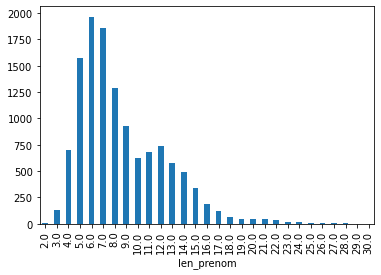

In [23]:
prenom.groupby("len_prenom")["prenom"].count().plot(kind="bar")

### Jointure avec reference de genre

In [38]:
genre = pd.DataFrame({"sex": ["M", "F"], "label": ["Homme", "Femme"]})
#genre = pd.DataFrame({"genre": ["M"], "label": ["Homme"]})

In [39]:
genre

,sex,label
0,M,Homme
1,F,Femme


In [42]:
# merge et join
prenom.merge(genre, how="left", left_on="genre", right_on="sex")

,prenom,genre,nb,len_prenom,sex,label
0,Michel,M,14136,6.0,M,Homme
1,Alain,M,10646,5.0,M,Homme
2,Philippe,M,9903,8.0,M,Homme
3,Bernard,M,8992,7.0,M,Homme
4,Christian,M,8102,9.0,M,Homme
...,...,...,...,...,...,...
12462,F.Jacques,M,1,9.0,M,Homme
12463,Frédie,F,1,6.0,F,Femme
12464,Efisia,F,1,6.0,F,Femme
12465,Cosima,F,1,6.0,F,Femme


In [35]:
genre

,genre,label
0,M,Homme


In [36]:
prenom.set_index("genre").join(genre.set_index("genre"))

,prenom,nb,len_prenom,label
genre,,,,
F,Catherine,4389,9.0,NaN
F,Françoise,4334,9.0,NaN
F,Isabelle,4295,8.0,NaN
F,Sylvie,4197,6.0,NaN
F,Martine,4094,7.0,NaN
...,...,...,...,...
M,Elefthérios,1,11.0,Homme
M,Patrice Bernard Jean,1,20.0,Homme
M,Desire,1,6.0,Homme


In [80]:
prenom.merge(genre, how="left")["label"].fillna("Toto")

0        Homme
1        Homme
2        Homme
3        Homme
4        Homme
         ...  
12462    Homme
12463     Toto
12464     Toto
12465     Toto
12466     Toto
Name: label, Length: 12467, dtype: object

<AxesSubplot:xlabel='len_prenom'>

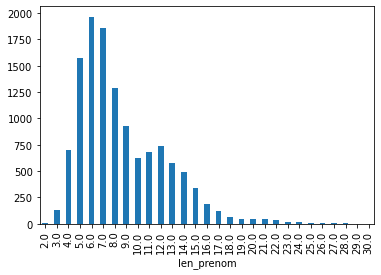

In [85]:
prenom.groupby("len_prenom")["prenom"].count().plot(kind="bar")

In [87]:
prenom.merge(genre, left_on="genre", right_on="genre")

,prenom,genre,nb,len_prenom,label
0,Michel,M,14136,6.0,Homme
1,Alain,M,10646,5.0,Homme
2,Philippe,M,9903,8.0,Homme
3,Bernard,M,8992,7.0,Homme
4,Christian,M,8102,9.0,Homme
...,...,...,...,...,...
6576,Elefthérios,M,1,11.0,Homme
6577,Patrice Bernard Jean,M,1,20.0,Homme
6578,Desire,M,1,6.0,Homme
6579,Pierre Emile,M,1,12.0,Homme


# Exercice world population

In [44]:
df = pd.read_csv("world population.csv")

In [45]:
df

,City / Urban area,Country,Population,Land area,Density
0,Tokyo/Yokohama,Japan,"33,200,000","6,993","4,750"
1,New York Metro,USA,"17,800,000","8,683","2,050"
2,Sao Paulo,Brazil,"17,700,000","1,968","9,000"
3,Seoul/Incheon,South Korea,"17,500,000","1,049","16,700"
4,Mexico City,Mexico,"17,400,000","2,072","8,400"
...,...,...,...,...,...
120,Copenhagen,Denmark,"1,525,000",816,"1,850"
121,Brisbane,Australia,"1,508,000","1,603",950
122,Riverside/San Bernardino,USA,"1,507,000","1,136","1,350"
123,Cincinnati,USA,"1,503,000","1,740",850


## Question 1 : calculer la somme de la population

In [46]:
df["Population"].sum()

'33,200,00017,800,00017,700,00017,500,00017,400,00016,425,00014,750,00014,350,00014,300,00014,250,00013,400,00012,700,00012,200,00011,789,00011,200,00010,800,00010,500,00010,000,0009,800,0009,645,0009,000,0009,000,0008,614,0008,308,0008,278,0008,000,0007,350,0007,250,0007,000,0007,000,0006,500,0006,000,0005,950,0005,700,0005,500,0005,425,0005,400,0005,300,0005,300,0005,149,0005,100,0005,000,0004,919,0004,900,0004,900,0004,750,0004,400,0004,367,0004,250,0004,200,0004,146,0004,032,0004,000,0004,000,0004,000,0004,000,0003,934,0003,903,0003,900,0003,823,0003,685,0003,675,0003,502,0003,500,0003,500,0003,229,0003,216,0003,200,0003,162,0003,100,0003,025,0002,907,0002,900,0002,800,0002,750,0002,750,0002,712,0002,700,0002,674,0002,650,0002,500,0002,500,0002,400,0002,389,0002,300,0002,284,0002,260,0002,250,0002,245,0002,217,0002,200,0002,200,0002,150,0002,100,0002,078,0002,076,0002,075,0002,062,0002,000,0002,000,0001,985,0001,960,0001,925,0001,900,0001,850,0001,830,0001,800,0001,800,0001,787,000

In [52]:
df["Population"] = df["Population"].str.replace(",", "").astype(int)

In [136]:
df["Population"].sum()

660404000

In [137]:
df

,City / Urban area,Country,Population,Land area,Density
0,Tokyo/Yokohama,Japan,33200000,"6,993","4,750"
1,New York Metro,USA,17800000,"8,683","2,050"
2,Sao Paulo,Brazil,17700000,"1,968","9,000"
3,Seoul/Incheon,South Korea,17500000,"1,049","16,700"
4,Mexico City,Mexico,17400000,"2,072","8,400"
...,...,...,...,...,...
120,Copenhagen,Denmark,1525000,816,"1,850"
121,Brisbane,Australia,1508000,"1,603",950
122,Riverside/San Bernardino,USA,1507000,"1,136","1,350"
123,Cincinnati,USA,1503000,"1,740",850


# Question 2 : Calculer la vraie densité de population et donner la ville la plus dense du monde

In [138]:
df["Land area"] = df["Land area"].str.replace(",", "").astype(int)

In [139]:
df["Real density"] = df["Population"] / df["Land area"]

In [140]:
df.sort_values("Real density", ascending=False)

,City / Urban area,Country,Population,Land area,Density,Real density
7,Mumbai,India,14350000,484,"29,650",29648.760331
11,Kolkata,India,12700000,531,"23,900",23917.137476
18,Karachi,Pakistan,9800000,518,"18,900",18918.918919
10,Lagos,Nigeria,13400000,738,"18,150",18157.181572
25,Shenzhen,China,8000000,466,"17,150",17167.381974
...,...,...,...,...,...,...
121,Brisbane,Australia,1508000,1603,950,940.736120
51,Boston,USA,4032000,4497,900,896.597732
123,Cincinnati,USA,1503000,1740,850,863.793103
109,Pittsburgh,USA,1753000,2208,800,793.931159


# Question 3 : donner le pays avec le plus de villes dans le dataset

In [151]:
df["Country"].value_counts().index[0]

'USA'

# Question 4 : Trouver les 3 pays les plus peuplés du dataset

In [166]:
df.groupby("Country")["Population"].sum().sort_values().tail(3)

Country
India     58000000
Japan     62850000
USA      103086000
Name: Population, dtype: int64

# Question 5 : Combien de villes commencent par la lettre P ?

In [175]:
df[df["City / Urban area"].str.startswith("P")]

,City / Urban area,Country,Population,Land area,Density,Real density
19,Paris,France,9645000,2723,"3,550",3542.049210
39,Philadelphia,USA,5149000,4661,"1,100",1104.698563
71,Phoenix/Mesa,USA,2907000,2069,"1,400",1405.026583
73,Porto Alegre,Brazil,2800000,583,"4,800",4802.744425
104,Pretoria,South Africa,1850000,673,"2,750",2748.885587
109,Pittsburgh,USA,1753000,2208,800,793.931159
115,Portland,USA,1583000,1228,"1,300",1289.087948


In [176]:
len(df[df["City / Urban area"].str.startswith("P")])

7

In [180]:
# methode apply
df[df["City / Urban area"].apply(lambda x: x.lower().startswith("p"))]

,City / Urban area,Country,Population,Land area,Density,Real density
19,Paris,France,9645000,2723,"3,550",3542.049210
39,Philadelphia,USA,5149000,4661,"1,100",1104.698563
71,Phoenix/Mesa,USA,2907000,2069,"1,400",1405.026583
73,Porto Alegre,Brazil,2800000,583,"4,800",4802.744425
104,Pretoria,South Africa,1850000,673,"2,750",2748.885587
109,Pittsburgh,USA,1753000,2208,800,793.931159
115,Portland,USA,1583000,1228,"1,300",1289.087948


In [179]:
df.where(df["City / Urban area"].str.startswith("P")).dropna()

,City / Urban area,Country,Population,Land area,Density,Real density
19,Paris,France,9645000.0,2723.0,"3,550",3542.049210
39,Philadelphia,USA,5149000.0,4661.0,"1,100",1104.698563
71,Phoenix/Mesa,USA,2907000.0,2069.0,"1,400",1405.026583
73,Porto Alegre,Brazil,2800000.0,583.0,"4,800",4802.744425
104,Pretoria,South Africa,1850000.0,673.0,"2,750",2748.885587
109,Pittsburgh,USA,1753000.0,2208.0,800,793.931159
115,Portland,USA,1583000.0,1228.0,"1,300",1289.087948
